## Part 1: Fundamentals

### 6. Fundamental terms in portfolio optimization 
- (notes from https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/#optimal-risky-portfolio)

There are some statistical terms required in optimization process without which an optimal portfolio can’t be defined. Don’t worry, I will simplify it and make it easy and clear.

We will go through each one through an example.

In this example, we are considering a portfolio made up of stocks from just 2 companies, Tesla and Facebook.

Step 1: Pull the stock price data

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st December, 2019.

In [61]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# input 1

In [62]:
# Read Data
test = data.DataReader(['TSLA', 'AAPL', 'BTC-USD', 'ETH-USD', 'MSFT', 'ARKK' ], 'yahoo', start='2018/01/01', end='2019/12/31')
test.head()

Attributes  Adj Close                                                  \
Symbols          TSLA       AAPL       BTC-USD     ETH-USD       MSFT   
Date                                                                    
2018-01-01        NaN        NaN  13657.200195  772.640991        NaN   
2018-01-02  21.368668  41.018425  14982.099609  884.443970  81.168503   
2018-01-03  21.150000  41.011280  15201.000000  962.719971  81.546234   
2018-01-04  20.974667  41.201771  15599.200195  980.921997  82.263969   
2018-01-05  21.105333  41.670872  17429.500000  997.719971  83.283882   

Attributes                 Close                                       ...  \
Symbols          ARKK       TSLA       AAPL       BTC-USD     ETH-USD  ...   
Date                                                                   ...   
2018-01-01        NaN        NaN        NaN  13657.200195  772.640991  ...   
2018-01-02  36.354523  21.368668  43.064999  14982.099609  884.443970  ...   
2018-01-03  36.505299  21.150000  43.057499  15201.000000  962.719971  ...   
2018-01-04  36.627800  20.974667  43.257500  15599.200195  980.921997  ...   
2018-01-05  37.221458  21.105333  43.750000  17429.500000  997.719971  ...   

Attributes          Open                                         Volume  \
Symbols          BTC-USD     ETH-USD       MSFT       ARKK         TSLA   
Date                                                                      
2018-01-01  14112.200195  755.757019        NaN        NaN          NaN   
2018-01-02  13625.000000  772.346008  86.129997  37.340000   65283000.0   
2018-01-03  14978.200195  886.000000  86.059998  38.950001   67822500.0   
2018-01-04  15270.700195  961.713013  86.589996  39.099998  149194500.0   
2018-01-05  15477.200195  975.750000  87.660004  39.259998   68868000.0   

Attributes                                                                 
Symbols            AAPL       BTC-USD       ETH-USD        MSFT      ARKK  
Date                                                                       
2018-01-01          NaN  1.029120e+10  2.595760e+09         NaN       NaN  
2018-01-02  102223600.0  1.684660e+10  5.783350e+09  22483800.0  420000.0  
2018-01-03  118071600.0  1.687190e+10  5.093160e+09  26061400.0  667300.0  
2018-01-04   89738400.0  2.178320e+10  6.502860e+09  21912000.0  358600.0  
2018-01-05   94640000.0  2.384090e+10  6.683150e+09  23407100.0  361200.0  

[5 rows x 36 columns]

In [63]:
# Closing price
test = test['Adj Close']
test.head()

Symbols,TSLA,AAPL,BTC-USD,ETH-USD,MSFT,ARKK
Date,,,,,,
2018-01-01,NaN,NaN,13657.200195,772.640991,NaN,NaN
2018-01-02,21.368668,41.018425,14982.099609,884.443970,81.168503,36.354523
2018-01-03,21.150000,41.011280,15201.000000,962.719971,81.546234,36.505299
2018-01-04,20.974667,41.201771,15599.200195,980.921997,82.263969,36.627800
2018-01-05,21.105333,41.670872,17429.500000,997.719971,83.283882,37.221458


In [64]:
# Drop na 
test = test.dropna()
test.head()

Symbols,TSLA,AAPL,BTC-USD,ETH-USD,MSFT,ARKK
Date,,,,,,
2018-01-02,21.368668,41.018425,14982.099609,884.443970,81.168503,36.354523
2018-01-03,21.150000,41.011280,15201.000000,962.719971,81.546234,36.505299
2018-01-04,20.974667,41.201771,15599.200195,980.921997,82.263969,36.627800
2018-01-05,21.105333,41.670872,17429.500000,997.719971,83.283882,37.221458
2018-01-08,22.427334,41.516094,15170.099609,1148.530029,83.368874,36.967030


In [65]:
# Log of percentage change
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

The variance in prices of stocks of Tesla are an important indicator of how volatile this investment will be (how returns can fluctuate).

It can be calculated for each company by using built in .var() function. Under the hood, the formula implemented by this function is given by:

s2=∑i=1N(xi–x¯)2/N−1

In [66]:
# Variance
var_tesla = tesla.var()
var_tesla

0.0011483733956322902

In [67]:
aapl = test['AAPL'].pct_change().apply(lambda x: np.log(1+x))
aapl.head()

Date
2018-01-02         NaN
2018-01-03   -0.000174
2018-01-04    0.004634
2018-01-05    0.011321
2018-01-08   -0.003721
Name: AAPL, dtype: float64

In [68]:
# Variance
var_aapl =aapl.var()
var_aapl
#> .00045697258417022536

0.0003027767966228646

Volatility is measured as the standard deviation of a company’s stock.

If you carefully look at the formula for standard deviation, you will understand that it is just the square root of variance.

But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.

250 is used because there are 250 trading days in a year.

In [69]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
aapl_vol = np.sqrt(var_aapl * 250)
tesla_vol, aapl_vol
#> .5358109337568289  .33799873674698305

(0.5358109264545401, 0.2751257878784105)

<AxesSubplot:xlabel='Symbols'>

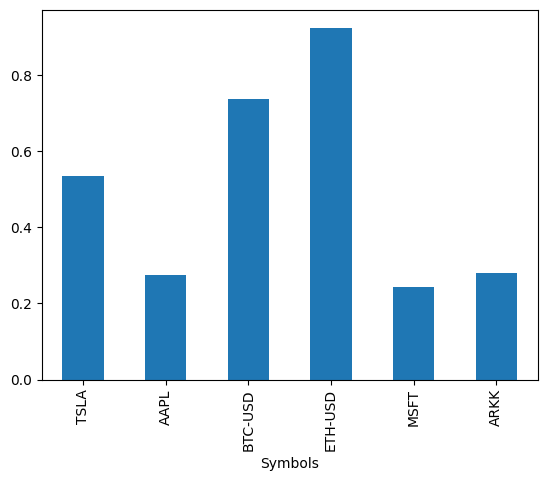

In [70]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

Covariance measures the directional relationship between the returns on two assets.

A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

We can calculate the covariance of Tesla and Facebook by using the .cov() function.

In [71]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,TSLA,AAPL,BTC-USD,ETH-USD,MSFT,ARKK
Date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.010286,-0.000174,0.014505,0.084803,0.004643,0.004139
2018-01-04,-0.008325,0.004634,0.025858,0.018730,0.008763,0.003350
2018-01-05,0.006210,0.011321,0.110945,0.016980,0.012322,0.016078
2018-01-08,0.060755,-0.003721,-0.138838,0.140766,0.001020,-0.006859


In [72]:
# Covariance
test1['TSLA'].cov(test1['AAPL'])
#> .00018261623156030972

0.00019007724226531092

You can notice that there is small positive covariance between Tesla and AAPL.

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

You can think of correlation as a scaled version of covariance, where the values are restricted to lie between -1 and +1.

A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.

A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.

A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

This is calculated using the .corr() function.

In [73]:
test1['TSLA'].corr(test1['AAPL'])
#> .2520883272466132

0.3223496968721925

Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.

For an yearly expected return value, you will need to resample the data year-wise, as you will see further.

For expected returns, you need to define weights for the assets choosen.

In simpler terms, this means you need to decide what percentage of your total money to you want to hold in each company’s stock.

Usually this decision is done by using the optimization techniques we will discuss later but for now we will consider random weights for Tesla and Facebook.

First, let’s compute the log of percentage change.

In [74]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2 = test2.dropna()
test2.head()

Symbols,TSLA,AAPL,BTC-USD,ETH-USD,MSFT,ARKK
Date,,,,,,
2018-01-03,-0.010286,-0.000174,0.014505,0.084803,0.004643,0.004139
2018-01-04,-0.008325,0.004634,0.025858,0.018730,0.008763,0.003350
2018-01-05,0.006210,0.011321,0.110945,0.016980,0.012322,0.016078
2018-01-08,0.060755,-0.003721,-0.138838,0.140766,0.001020,-0.006859
2018-01-09,-0.008118,-0.000115,-0.038620,0.123681,-0.000680,0.002037


Weights
Let’s define an array of random weights for the purpose of calculation. These weights will represent the percentage allocation of investments between these two stocks. They must add up to 1.

So, the problem of portfolio optimization is nothing but to find the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation).

# input 2: 

In [75]:
# Define weights for allocation
w = [0.16, 0.16, 0.16, 0.16, 0.16, 0.16]
e_r_ind = test2.mean()
e_r_ind

Symbols
TSLA       0.000530
AAPL       0.001122
BTC-USD   -0.001461
ETH-USD   -0.003826
MSFT       0.001272
ARKK       0.000589
dtype: float64

The total expected return for a portfolio is given by:

E(Rp)=w1E(R1)+w2E(R2)+…..wnE(Rn)
Thus, e_r, or total expected return can be calculated as:

In [76]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r
#> .0003027691524101118

-0.00028373371488520853

### 7. Building an optimal risky portfolio
Now that you have gone through the building blocks of portfolio optimization, it is time to create an optimal portfolio using the same concepts.

We will be using stocks from 4 companies, namely, Apple, Nike, Google and Amazon for a period of 5 years.

You will learn to calculate the weights of assets for each one. Then, we will calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier. You will also learn a new term called Sharpe Ratio.

Let’s get started by pulling the required asset data from Yahoo.

# input 3:

In [77]:
# Import data
df = data.DataReader(['TSLA', 'AAPL', 'BTC-USD', 'ETH-USD', 'MSFT', 'ARKK'], 'yahoo', start='2015/01/01', end='2022/10/31').dropna()
df.head()

Attributes  Adj Close                                                 \
Symbols          TSLA       AAPL      BTC-USD     ETH-USD       MSFT   
Date                                                                   
2017-11-09  20.199333  41.730415  7143.580078  320.884003  79.015144   
2017-11-10  20.199333  41.592297  6618.140137  299.252991  78.808441   
2017-11-13  21.026667  41.425617  6559.490234  316.716003  78.864815   
2017-11-14  20.580000  40.799358  6635.750000  337.631012  78.977562   
2017-11-15  20.753332  40.261208  7315.540039  333.356995  78.363716   

Attributes                 Close                                      ...  \
Symbols          ARKK       TSLA       AAPL      BTC-USD     ETH-USD  ...   
Date                                                                  ...   
2017-11-09  32.244072  20.199333  43.970001  7143.580078  320.884003  ...   
2017-11-10  32.281281  20.199333  43.667500  6618.140137  299.252991  ...   
2017-11-13  32.420822  21.026667  43.492500  6559.490234  316.716003  ...   
2017-11-14  32.104523  20.580000  42.834999  6635.750000  337.631012  ...   
2017-11-15  32.188251  20.753332  42.270000  7315.540039  333.356995  ...   

Attributes         Open                                         Volume  \
Symbols         BTC-USD     ETH-USD       MSFT       ARKK         TSLA   
Date                                                                     
2017-11-09  7446.830078  308.644989  84.110001  34.639999   81706500.0   
2017-11-10  7173.729980  320.670990  83.790001  34.560001   69381000.0   
2017-11-13  5938.250000  307.024994  83.660004  34.660000  113773500.0   
2017-11-14  6561.479980  316.763000  83.500000  34.720001   85141500.0   
2017-11-15  6634.759766  337.963989  83.470001  34.349998   89680500.0   

Attributes                                                                 
Symbols            AAPL       BTC-USD       ETH-USD        MSFT      ARKK  
Date                                                                       
2017-11-09  117930400.0  3.226250e+09  8.932500e+08  21178400.0  160800.0  
2017-11-10  100582000.0  5.208250e+09  8.859860e+08  19397800.0   98400.0  
2017-11-13   67928400.0  6.263250e+09  1.041890e+09  14196900.0   97600.0  
2017-11-14   99130000.0  3.197110e+09  1.069680e+09  18801300.0  161000.0  
2017-11-15  116632400.0  4.200880e+09  7.226660e+08  19383100.0  196300.0  

[5 rows x 36 columns]

In [78]:
# Closing price
df = df['Adj Close']
df.head()
df.to_csv('closing prices.csv')

### 8. Covariance and Correlation matrix
The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other. When we had a 2 asset portfolio, we directly plugged in the names of the assets into .cov() and .corr() functions.

In this case, we will need a matrix for better visualisation. This is also achieved by using the same 2 functions on our dataframe df.

Note that we perform necessary operations to display log change in prices of stocks each day.

In [79]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,TSLA,AAPL,BTC-USD,ETH-USD,MSFT,ARKK
Symbols,,,,,,
TSLA,0.001644,0.000398,0.000352,0.000491,0.000370,0.000716
AAPL,0.000398,0.000431,0.000216,0.000307,0.000307,0.000364
BTC-USD,0.000352,0.000216,0.002317,0.002318,0.000227,0.000413
ETH-USD,0.000491,0.000307,0.002318,0.003895,0.000312,0.000536
MSFT,0.000370,0.000307,0.000227,0.000312,0.000371,0.000359
ARKK,0.000716,0.000364,0.000413,0.000536,0.000359,0.000773


The covariance between Apple and Apple, or Nike and Nike is the variance of that asset.

The next step is to create the correlation matrix. Correlation ranges from -1 to 1.
A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.
A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.
A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [80]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,TSLA,AAPL,BTC-USD,ETH-USD,MSFT,ARKK
Symbols,,,,,,
TSLA,1.000000,0.472634,0.180443,0.194170,0.473470,0.635240
AAPL,0.472634,1.000000,0.215704,0.237082,0.767380,0.631394
BTC-USD,0.180443,0.215704,1.000000,0.771533,0.245328,0.308814
ETH-USD,0.194170,0.237082,0.771533,1.000000,0.259773,0.308842
MSFT,0.473470,0.767380,0.245328,0.259773,1.000000,0.669782
ARKK,0.635240,0.631394,0.308814,0.308842,0.669782,1.000000


As you can see, an asset always has a perfectly positive correlation of 1 with itself.

## Part 2

###  Portfolio Variance
The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:

$$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$

Here, wi and wj denote weights of all assets from 1 to n (in our case from 1 to 4) and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all 4 assets. Remember that sum of weights should always be 1.

# input 4:

In [81]:
# Randomly weighted portfolio's variance
w = {'TSLA': 0.16, 'AAPL': 0.16, 'BTC-USD': 0.16, 'ETH-USD': 0.16, 'MSFT': 0.16, 'ARKK': 0.16}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0006349019601254109

Thus we have found the portfolio variance. But for truly optimizing the portfolio, we cant plug in random weights. We will need to calculate it according to what gives us maximum expected returns.

How will you find the portfolio expected return?

### 9. Portfolio expected returns
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.
If we dont perform resampling, we will get daily returns, like you saw earlier in the ‘Fundamental Terms’ section.

In [82]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
TSLA       1.580753
AAPL       0.374469
BTC-USD    0.649659
ETH-USD    1.451933
MSFT       0.285672
ARKK       0.216772
dtype: float64

# input 5:

In [83]:
# Portfolio returns
w = [0.16, 0.16, 0.16, 0.16, 0.16, 0.16]
port_er = (w*ind_er).sum()
port_er

0.7294811886844632

Plotting the efficient frontier
This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.
But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [84]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
TSLA       0.641035
AAPL       0.328174
BTC-USD    0.761117
ETH-USD    0.986742
MSFT       0.304541
ARKK       0.439504
dtype: float64

In [85]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
TSLA,1.580753,0.641035
AAPL,0.374469,0.328174
BTC-USD,0.649659,0.761117
ETH-USD,1.451933,0.986742
MSFT,0.285672,0.304541
ARKK,0.216772,0.439504


Amazon has the maximum risk attached but it also offers the maximum returns. Apple lies somewhere in the middle, with average risk and return rates.

### Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

### We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
Keep reading further to see how it’s done.

In [86]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [87]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [88]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [89]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,TSLA weight,AAPL weight,BTC-USD weight,ETH-USD weight,MSFT weight,ARKK weight
0,0.796787,0.523820,0.047829,0.155052,0.284467,0.285941,0.203201,0.023509
1,0.851980,0.506885,0.148032,0.000195,0.179900,0.281582,0.110148,0.280144
2,0.798828,0.479135,0.072039,0.286350,0.105703,0.316856,0.021976,0.197076
3,0.813243,0.388950,0.258614,0.240088,0.075375,0.132305,0.142500,0.151117
4,0.466980,0.342648,0.031785,0.370534,0.024854,0.103097,0.149781,0.319948


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

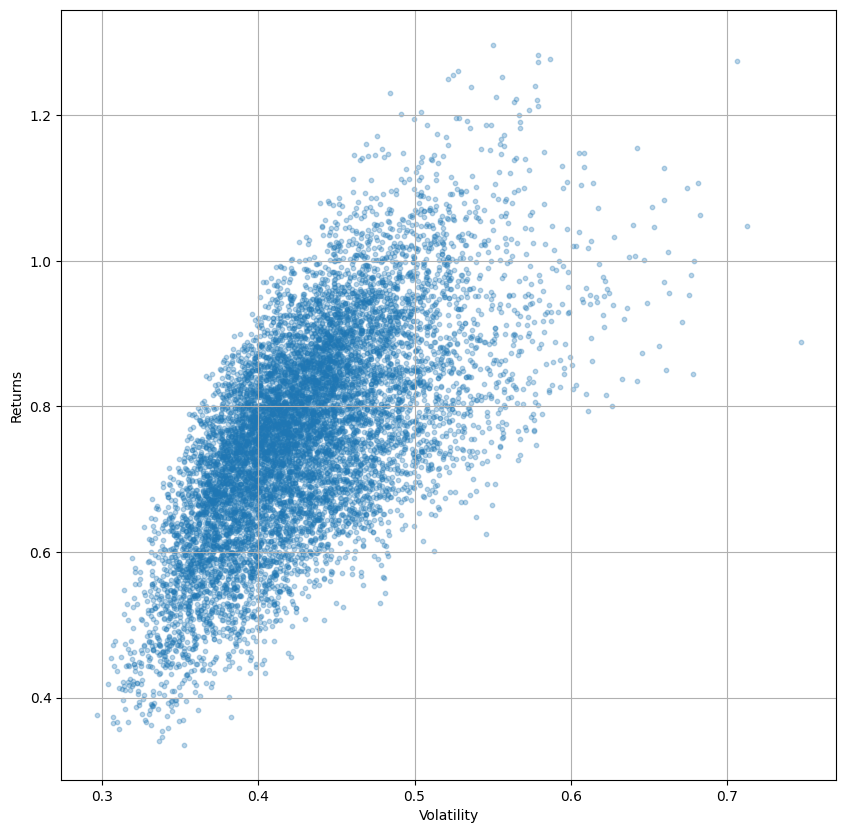

In [90]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

### How to read the Efficient Frontier?
Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

1. Minimum volatility (left most point)
2. Maximum returns (top most point)

And everything in between.

In [91]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns           0.376412
Volatility        0.296368
TSLA weight       0.011552
AAPL weight       0.365864
BTC-USD weight    0.065160
ETH-USD weight    0.018632
MSFT weight       0.507496
ARKK weight       0.031295
Name: 2023, dtype: float64

The minimum volatility is in a portfolio where the weights of Apple, Nike, Google and Amazon are 26%, 39%, 30% and 4% respectively. This point can be plotted on the efficient frontier graph as shown:

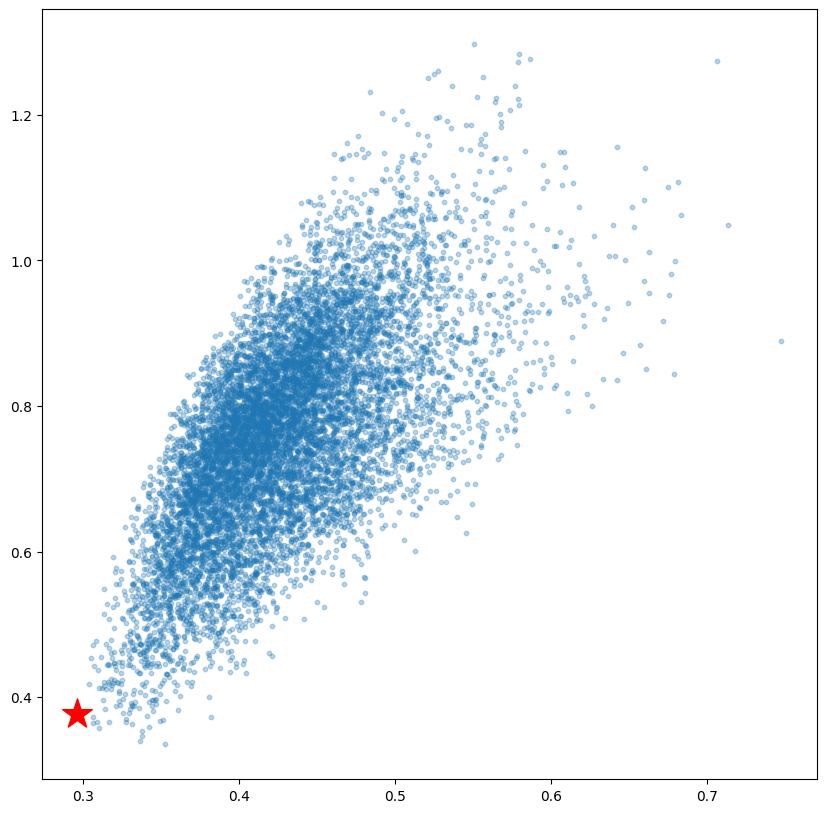

In [92]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

### The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?
This is done by using a parameter called the Sharpe Ratio.

Sharpe Ratio
The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio.

![sharpe formula](image/Sharpe-Ratio-300x149.jpg)





## Part 3: Optimal Risky Portfolio
An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.

In [93]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port.to_csv('optimal_portfolio.csv')
optimal_risky_port


Returns           1.231017
Volatility        0.484247
TSLA weight       0.585122
AAPL weight       0.054631
BTC-USD weight    0.001307
ETH-USD weight    0.159065
MSFT weight       0.152352
ARKK weight       0.047523
Name: 187, dtype: float64

You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.
We can plot this point too on the graph of efficient frontier.

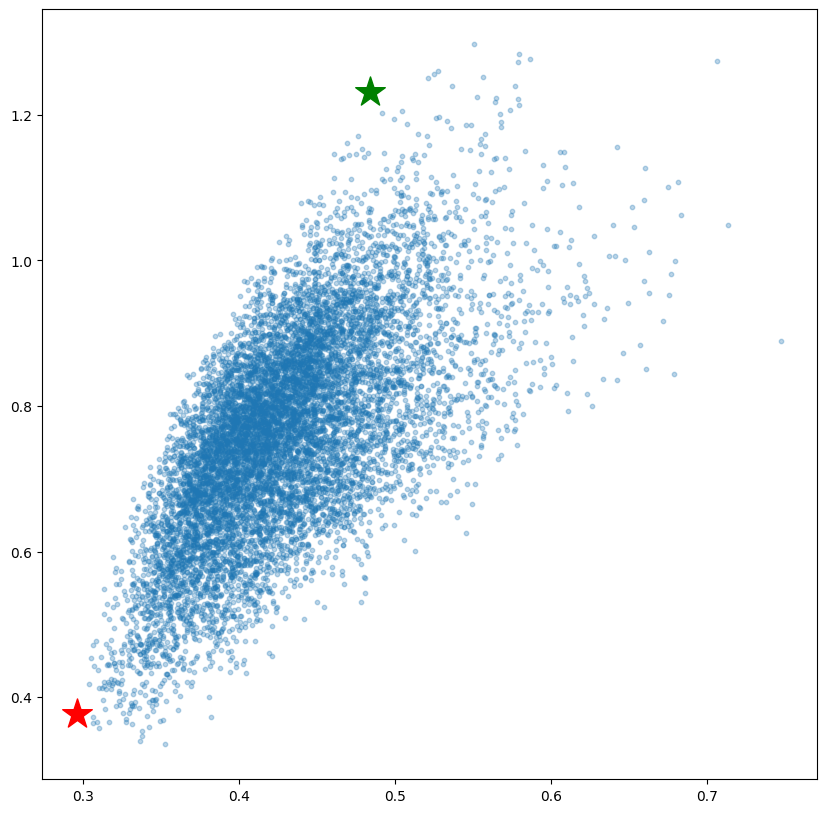

In [94]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star represents the optimal risky portfolio.

References
- Video series by Finquest (https://www.youtube.com/watch?v=Mb4H3MaJnl8&list=PLLVfjXL2pnkQQXmBMPu_NIst57AKak5Z1)
- Investopedia (https://www.investopedia.com/terms/p/portfoliomanagement.asp)